### Exercises II
Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

<i> As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. 
    <br>
    You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. 
    
#### Your goal is to predict the values of single unit properties using the obervations from 2017.

In these exercises, you will complete the first step toward the above goal: <mark>acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.</mark>

1) Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [29]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
from babel.numbers import format_currency
import wrangle

In [2]:
#read the SQL dataset into pandas Dataframe

df = pd.read_sql("SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt,  taxamount , fips FROM properties_2017 JOIN propertylandusetype USING (propertylandusetypeid)WHERE propertylandusetype.propertylandusedesc = 'Single Family Residential';", env.get_db_url('zillow'))

df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


2) Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. 

You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

#### Acquisition Summary:

In [3]:
df.shape

(2152863, 7)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [5]:
#dtypes look great for now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [6]:
#finding nulls
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

#### Prep-Clean:
We have ALOT of nulls. So focus on cleaning will be dropping nulls.

In [7]:
# Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df.

df = df.replace(r'^\s*$', np.nan, regex=True)


In [8]:
#whelp, that showed me there was no whitespace as reasoning for nulls...
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [9]:
#because each column isn't dependant on eachother ( or easy to configure what the missing numbers would be), let's drop all NaNs
df = df.dropna()
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [10]:
df.head(20)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
15,0.0,0.0,203.0,14166.0,1960.0,163.79,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0
21,4.0,4.0,4144.0,1303522.0,2016.0,14820.10,6037.0


#### Convert Datatyes

In [11]:
#Changing dtype of Fips code so only 4 digits (no decimals)
df['fips'] = df['fips'].astype('int')

In [12]:
#Changing dtype of year built so only 4 digits (no decimals)
df['yearbuilt'] = df['yearbuilt'].astype('int')

In [13]:
#Changing dtype of squarefeet so no decimals
df['calculatedfinishedsquarefeet'] = df['calculatedfinishedsquarefeet'].astype('int')

In [14]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633,296425.0,2005,6941.39,6037
6,3.0,4.0,1620,847770.0,2011,10244.94,6037
7,3.0,2.0,2077,646760.0,1926,7924.68,6037
11,0.0,0.0,1200,5328.0,1972,91.60,6037
14,0.0,0.0,171,6920.0,1973,255.17,6037


In [15]:
#Converting taxvaluedollarcnt into currency
df["taxvaluedollarcnt"] = df["taxvaluedollarcnt"].apply(lambda x: format_currency(x, currency="USD", locale="en_US"))

In [17]:
#Converting taxvaluedollarcnt into currency
df["taxamount"] = df["taxamount"].apply(lambda x: format_currency(x, currency="USD", locale="en_US"))

In [18]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633,"$296,425.00",2005,"$6,941.39",6037
6,3.0,4.0,1620,"$847,770.00",2011,"$10,244.94",6037
7,3.0,2.0,2077,"$646,760.00",1926,"$7,924.68",6037
11,0.0,0.0,1200,"$5,328.00",1972,$91.60,6037
14,0.0,0.0,171,"$6,920.00",1973,$255.17,6037


#### Rename Columns

In [21]:
df = df.rename(columns={"bedroomcnt": "Bedroom_Count", "bathroomcnt": "Bathroom_count", "calculatedfinishedsquarefeet": "square_feet", "taxvaluedollarcnt": "Tax_Value", "taxamount": "Tax_amount", "fips": "Fips_code"})

In [22]:
df.head()

,Bedroom_Count,Bathroom_count,square_feet,Tax_Value,yearbuilt,Tax_amount,Fips_code
4,4.0,2.0,3633,"$296,425.00",2005,"$6,941.39",6037
6,3.0,4.0,1620,"$847,770.00",2011,"$10,244.94",6037
7,3.0,2.0,2077,"$646,760.00",1926,"$7,924.68",6037
11,0.0,0.0,1200,"$5,328.00",1972,$91.60,6037
14,0.0,0.0,171,"$6,920.00",1973,$255.17,6037


#### Visualize Distributions

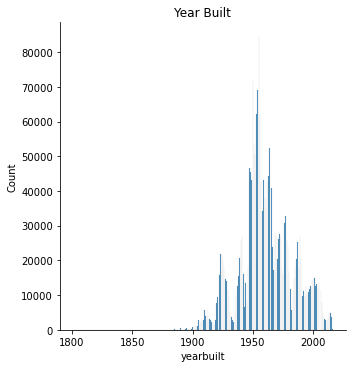

In [26]:
#using sns displot to see values of homes and the years built 
sns.displot(x='yearbuilt', data=df)

plt.title('Year Built')
plt.show()

3) Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your wrangle.py file. 

Name your final function wrangle_zillow.

In [32]:
df = wrangle.wrangle_zillow(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Bedroom_Count   float64
 1   Bathroom_count  float64
 2   square_feet     int64  
 3   Tax_Value       object 
 4   yearbuilt       int64  
 5   Tax_amount      object 
 6   Fips_code       int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 130.6+ MB
